## MATH 4/5388: Machine Learning Methods
## Homework 1 
### Due date: Tuesday, February 4 

#### Submission Instruction: 
* Submit both the Jupyter notebook file (.ipynb) and a PDF copy of the notebook.
* Ensure that your notebook runs properly before submitting it:
    * Kernel -> Restart & Run All to ensure that there are no errors.
* To generate a PDF of your notebook:
    * File -> Print Preview followed by printing to a PDF from your browser;
    or:
    * File -> Download as -> PDF via LaTeX.
* If this doesn’t work, try first exporting as an HTML file and then converting that to PDF (load it in a web browser and print it to PDF).

* Some questions are specifically designated for either 4388 or 5388, and students should respond only to the questions relevant to their enrolled class. For instance, students in 4388 should not answer questions labeled exclusively for 5388, and vice versa. For example, Problem 1 applies to all students enrolled in either 4388 or 5388. However, Problem 4c has two separate versions: one for 4388 and another for 5388.

### Problem 1 (20 points)

1a. What is the main data requirement for supervised machine learning models to function properly?  

1b. Why is this requirement essential for training these models?

1c. What are the two primary types of supervised machine learning models? 

1d. Can identical loss functions be used to measure the quality of predictions for both types of supervised machine learning? Why or why not?



### 1a
The main data requirement for supervised machine learning models to function properly is having labeled data.

### 1b
Labeled data is essential for training supervised machine learning models because the models are then able to make predictions to classify the data. Similarly, supervised models are able to adjust parameters to minimize error between predictions and actual data.

### 1c
The two primary types of supervised machine learning models are classification and regression models.

### 1d
Generally, identical loss functions for classification and regression are not used because classification is predicting a discrete output variable while regression is predicting a real number.

### Problem 2 (30 points)

In this assignment, you will use Python, NumPy, and Matplotlib to visualize three different loss functions commonly used in regression problems: Quadratic Loss (Mean Squared Error), L1 Loss (Mean Absolute Error), and Huber Loss. Follow the steps below to complete the assignment.

The formulas for the three loss functions are:

* Quadratic Loss (Mean Squared Error)
\begin{equation}
L_{\text{quadratic}}(y, \hat{y}) = (y - \hat{y})^2
\end{equation}

* L1 Loss (Mean Absolute Error):
\begin{equation}
L_{\text{L1}}(y, \hat{y}) = |y - \hat{y}|
\end{equation}

* Huber Loss:
\begin{equation}
L_{\text{Huber}}(y, \hat{y}) =
\begin{cases}
\frac{1}{2}(y - \hat{y})^2, & \text{if } |y - \hat{y}| \leq \delta \\
\delta |y - \hat{y}| - \frac{1}{2}\delta^2, & \text{if } |y - \hat{y}| > \delta
\end{cases}
\end{equation}
Here, $\delta$ is a parameter that controls the threshold at which the loss transitions from quadratic to linear.

Write a Python script to do the following:

2a. Use NumPy to create an array of values for $(y - \hat{y})$, ranging from -3 to 3.

2b. Implement the three loss functions using the `def` keyword: Quadratic Loss, L1 Loss, and Huber Loss (use $\delta = 1$)

2c. Use Matplotlib to plot all three loss functions on the same graph. Please label the axes appropriately and include a legend to differentiate the loss functions.


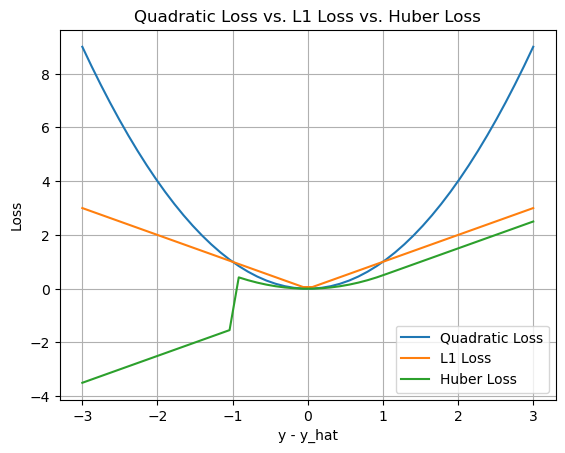

In [5]:
# Your solution here
import numpy as np
import matplotlib.pyplot as plt

vals = np.linspace(-3, 3)

def quadLoss(vals):
    return [val ** 2 for val in vals]

def l1Loss(vals):
    return [abs(val) for val in vals]

def huberLoss(vals):
    return [(val ** 2)/2 if abs(val) <= 1 else val - 1/2 for val in vals]

plt.plot(vals, quadLoss(vals), label = "Quadratic Loss")
plt.plot(vals, l1Loss(vals), label = "L1 Loss")
plt.plot(vals, huberLoss(vals), label = "Huber Loss")
plt.title("Quadratic Loss vs. L1 Loss vs. Huber Loss")
plt.xlabel("y - y_hat")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


### Problem 3 (20 points)

In NumPy, a 2D array (or matrix) can be thought of as a grid of numbers with rows and columns. Operations on these arrays often involve specifying an axis, which determines how the operation is applied:

* Axis 0 (columns): Operations are applied along the vertical direction (column-wise).
* Axis 1 (rows): Operations are applied along the horizontal direction (row-wise).

For example, summing a matrix along axis=0 computes the sum of each column, while summing along axis=1 computes the sum of each row.

3a. Normalize each row by dividing each element in the row by the sum of the row.

3b. Normalize each row by dividing each element in the row by the norm of the row.

3c. Center each row by subtracting the row's mean from every element in the row.

Use the following matrix for all tasks.

In [7]:
import numpy as np

# Given matrix
matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

In [8]:
# solution
# used ChatGPT to solve the issue of all rows being divided by the sum of row 1 by using keepdims
# as well as using np.linalg.norm
# 3a 
row_sum = matrix.sum(axis=1, keepdims=True)
new_matrix = matrix / row_sum
print(new_matrix)

# 3b 
norms = np.linalg.norm(matrix, axis=1, keepdims=True)
new_matrix = matrix / norms
print(new_matrix)

# 3c
mean = matrix.mean(axis=1, keepdims=True)
new_matrix = matrix / mean
print(new_matrix)


[[0.16666667 0.33333333 0.5       ]
 [0.26666667 0.33333333 0.4       ]
 [0.29166667 0.33333333 0.375     ]]
[[0.26726124 0.53452248 0.80178373]
 [0.45584231 0.56980288 0.68376346]
 [0.50257071 0.57436653 0.64616234]]
[[0.5   1.    1.5  ]
 [0.8   1.    1.2  ]
 [0.875 1.    1.125]]


### Problem 4 (20 points)

The linear regression model is:
\begin{equation}
y_n = \beta_0 + \beta_1 x_n + \epsilon_n
\end{equation}
where:
- $y_n$: Dependent variable (output)
- $x_n$: Independent variable (input)
- $\beta_0$: Intercept
- $\beta_1$: Slope
- $\epsilon_n \sim \mathcal{N}(0, \sigma^2)$: Gaussian noise with mean 0 and known variance $\sigma^2$

The conditional probability of observing $y_n$ given $x_n$, $\beta_0$, and $\beta_1$ is:
    \begin{equation}
    p(y_n | x_n, \beta_0, \beta_1, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_n - \beta_0 - \beta_1 x_n)^2}{2\sigma^2}\right)
    \end{equation}
    
4a. Write the likelihood function for $N$ observations (i.e., $n=1,\ldots,N$) under the assumption of Gaussian noise.

4b. Derive the log-likelihood function by taking the natural logarithm of the likelihood function.

4c. [4388] Show that the negative log-likelihood is proportional to the Residual Sum of Squares (RSS):

\begin{equation}
    \text{RSS}(\beta_0,\beta_1) = \sum_{i=1}^N (y_i - \beta_0 - \beta_1 x_i)^2
\end{equation}

4c. [5388] Show that the negative log-likelihood is proportional to the Residual Sum of Squares (RSS). In addition, show that the minimizers are

\begin{equation*}
\beta_1^* = \frac{\sum_{n=1}^N (x_n - \bar{x})(y_n - \bar{y})}{\sum_{n=1}^N (x_n - \bar{x})^2}
\end{equation*}

and 

\begin{equation*}
\beta_0^* = \bar{y} - \beta_1^* \bar{x}
\end{equation*}

where $\bar{x}$ and $\bar{y}$ are sample means.

# solution
![Homework1](Homework_page1.jpg)
![Homework2](Homework_page2.jpg)

### Problem 5 (10 points)

In this assignment, we will use the "Credit.csv" data set to explore linear regression. Your task is to redefine the `SimpleLinearRegression` class from Lecture 1 and use it to solve a regression problem.

5a. Use a for loop to iterate over the first three columns in the data 
set: `Income`, `Limit`, and `Rating`. For each column, use it as the input/feature ($x$) to predict the `Balance` column (target/output).

5b. For each input column ($x$), report:
- The regression coefficients ($\beta_0$ and $\beta_1$)
- A visualization showing the actual data points and the fitted regression line. 


In [12]:
import numpy as np 
import pandas as pd


df = pd.read_csv("Credit.csv")
                 
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


Beta_0, Beta_1 values for Income: 246.51475059140324 , 6.0483634085315625


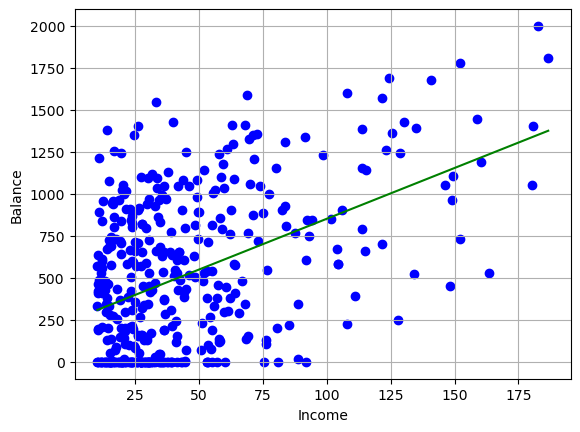

Beta_0, Beta_1 values for Limit: -292.79049545599264 , 0.17163727837148252


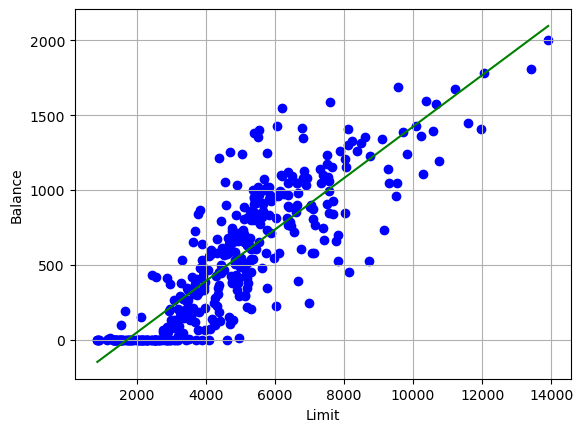

Beta_0, Beta_1 values for Rating: -390.84634178723775 , 2.566240327343319


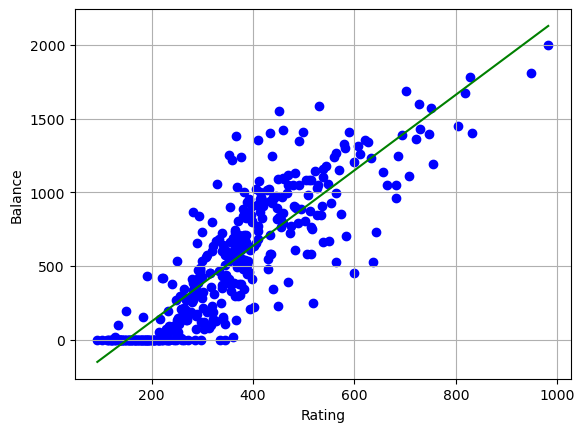

In [13]:
# solution
class SimpleLinearRegression:
    def __init__(self):
    # Initialize parameters (beta_0 and beta_1) to None
        self.beta_0 = None
        self.beta_1 = None
    def fit(self, x, y):
        """
        Fit the model to the data using the provided formulas.
        Args:
        x: List or array of input features
        y: List or array of target values
        """
        n = len(x)
        x_mean = sum(x) / n
        y_mean = sum(y) / n
        # Calculate beta_1 using the provided formula
        numerator = sum((xi - x_mean) * (yi - y_mean) for xi, yi in zip(x, y))
        denominator = sum((xi - x_mean) ** 2 for xi in x)
        self.beta_1 = numerator / denominator
        # Calculate beta_0 using the provided formula
        self.beta_0 = y_mean - self.beta_1 * x_mean
    def predict(self, x):
        """
        Predict the target values for given input features.
        Args:
        x: List or array of input features
        Returns:
        List of predicted values
        """
        return [self.beta_0 + self.beta_1 * xi for xi in x]


columns = ["Income", "Limit", "Rating"]
for column in columns:
    x = df[column].tolist()
    y = df["Balance"].tolist()
    
    model = SimpleLinearRegression()
    model.fit(x, y)
    
    x_pred = np.linspace(min(x), max(x))
    y_pred = model.predict(x_pred)

    print(f"Beta_0, Beta_1 values for {column}: {model.beta_0} , {model.beta_1}"), 
    
    plt.scatter(x, y, c="blue")
    plt.plot(x_pred, y_pred, c="green")
    plt.xlabel(column)
    plt.ylabel('Balance')
    plt.grid(True)
    plt.show()
